<a href="https://colab.research.google.com/github/felipe-parodi/DL4DataScience/blob/main/Week11_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS-522 Week 11 Homework


**Instructor:** Dinesh Jayaraman

**Content Creator:** Chuning Zhu

In [ ]:
#@markdown What is your Pennkey and pod? (text, not numbers, e.g. bfranklin)
my_pennkey = 'fparodi' #@param {type:"string"}
my_pod = 'superfluous-lyrebird' #@param ['Select', 'euclidean-wombat', 'sublime-newt', 'buoyant-unicorn', 'lackadaisical-manatee','indelible-stingray','superfluous-lyrebird','discreet-reindeer','quizzical-goldfish','astute-jellyfish','ubiquitous-cheetah','nonchalant-crocodile','fashionable-lemur','spiffy-eagle','electric-emu','quotidian-lion']


# Section 1: Reading

For this week's homework assignment, you will read the [Rainbow DQN paper](https://arxiv.org/abs/1710.02298). Rainbow combines multiple extensions to the DQN algorithm. You will **read the first 3 pages** of the paper, which gives an overview of the DQN algorithm and its extensions. Choose one extension that interests you the most and write a short paragraph explaining what problem it addresses and how it works. Then, go through the corresponding ablation studies (page 6) and describe its ablation results. Feel free to dig further by reading the original paper that proposed the extension or finding online blogposts/articles. For your reference, here's a list of extensions covered in Rainbow:

- Double Q-learning
- Prioritized replay
- Dueling networks
- Multi-step learning
- Distributional RL
- Noisy Nets

In [ ]:
#@markdown Which extension to DQN did you choose?
extension = "Prioritized replay" #@param ["Double Q-learning", "Prioritized replay", "Dueling networks", "Multi-step learning", "Distributional RL", "Noisy Nets"]
#@markdown What problem of DQN does it address? How does it work?
explanation = "I chose the prioritized experience replay extension. The problem this extension addresses is the uniform sampling, which gives all experiences the same probability to be sampled. In reality, some \u201Cexperiences\u201D are more valuable than others. So the extension samples experiences with weights, that is, we want to use the experiences that \u201Cfrom which there is much to learn\u201D (those that yielded a sizable difference between expected and actual reward). " #@param {type:"string"}
#@markdown Describe its ablation results.
ablation = "Removing prioritized replay resulted in reduced performance across all but a handful of games. It seem it is quite helpful!" #@param {type:"string"}
try:t1;
except NameError: t1 = time.time()

# Section 2: Coding

## Setup

In [ ]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu 

In [ ]:
# @title Install
!apt install -q xvfb
!pip install -q pyvirtualdisplay

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  xserver-common
Recommended packages:
  xfonts-base
The following NEW packages will be installed:
  xvfb
The following packages will be upgraded:
  xserver-common
1 upgraded, 1 newly installed, 0 to remove and 56 not upgraded.
Need to get 811 kB of archives.
After this operation, 2,270 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 xserver-common all 2:1.19.6-1ubuntu4.9 [26.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.9 [784 kB]
Fetched 811 kB in 1s (1,196 kB/s)
(Reading database ... 160983 files and directories currently installed.)
Preparing to unpack .../xserver-common_2%3a1.19.6-1ubuntu4.9_all.deb ...
Unpacking xserver-common (2:1.19.6-1ubuntu4.9) over (2:1.19.6-1ubuntu4.8) ...
Selecting previously unselected package xvfb.
Preparin

In [ ]:
# @title Imports
import time
import gym
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
# @title Figure settings
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import ipywidgets as widgets

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

plt.rcParams.update(plt.rcParamsDefault)
plt.rc('animation', html='jshtml')

from IPython import display
from pyvirtualdisplay import Display

d = Display()
d.start();

## Implementing a simple DQN

In this section, you will code up a "vanilla" DQN without the bells and whistles to solve a simple task from OpenAI Gym. The goal is to get some hands-on experience with the Gym interface and writing a reinforcement learning training loop from scratch.

First, read through [Getting Started with Gym](https://gym.openai.com/docs/) to familiarize yourself with the OpenAI Gym library, and in particular its interface. Then, find the state dimension and the number of actions for the [MountainCar](https://gym.openai.com/envs/MountainCar-v0/) environment. Explain what the meaning of its states and actions.



In [ ]:
env = gym.make('MountainCar-v0')
env.reset()
for _ in range(1000):
    env.render()
    env.step(env.action_space.sample()) # take a random action
env.close()

In [ ]:
print('State space: ', env.observation_space)

State space:  Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)


In [ ]:
print('State space: ', env.action_space)

State space:  Discrete(3)


In [ ]:
env = gym.make('MountainCar-v0')
state_dim = 2
n_actions = 3
print(f'state_dim = {state_dim}, n_actions = {n_actions}')

state_dim = 2, n_actions = 3


In [ ]:
#@markdown What is the state dimension?
state_dimension = 2 #@param
#@markdown How many actions are there in this environment?
num_actions = 3 #@param
#@markdown Explain what the states and actions correspond to in this environment.
meaning = "actions: push left, right, or stay in place; 2 for a 2 dimensional box" #@param {type:"string"}

try:t2;
except NameError: t2 = time.time()

The follow cell defines the QNetwork class. The Q network accepts a state vector as input and outputs the Q-values for all actions given the current state. Fill in missing parameters with your answers to the previous questions. 

In [ ]:
class QNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # TODO: Insert answers from previous questions
        self.state_dim = state_dim 
        self.n_actions = n_actions
        self.n_hidden = 100

        self.layers = nn.Sequential(
            nn.Linear(self.state_dim, self.n_hidden, bias=False),
            nn.Tanh(),
            nn.Linear(self.n_hidden, self.n_hidden, bias=False),
            nn.Tanh(),
            nn.Linear(self.n_hidden, self.n_actions, bias=False)
        )

    def forward(self, state):
        return self.layers(state)

Follow the instructions to complete epsilon-greedy policy and train_DQN function. Note that the raw reward of the environment is -1 for each timestep. To make learning easier, we define our own reward which considers the current position of the car. After obtaining the next state by executing an action, feed it to the provided reward_shaping function to get the shaped reward.

Recall that the loss of the Q network can be computed as $$\ell(\phi, s, a, r, s') = \left[Q_{\phi}(s, a) - \left(r + \gamma\max_{a'} Q_{\phi}(s', a')\right)\right]^2$$ and we update the Q network by performing a gradient-descent step $$\phi \leftarrow \phi - \alpha\nabla_{\phi}\ell(\phi, s, a, r, s')$$

In [ ]:
def reward_shaping(next_state):
    # Reward is position + 0.5
    reward = next_state[0] + 0.5
    # If goal is reached, give additional reward
    if next_state[0] >= 0.5:
        reward += 1
    return reward

def epsilon_greedy(Q_values, epsilon):
    # TODO: select an action using epsilon-greedy policy
    # Generate a random number between 0 and 1. If it is less than epsilon, then
    # sample a random action from the action space. Otherwise select the action
    # with the maximum Q-value.
    random_number = torch.rand(1)
    if random_number < epsilon:
      out = torch.randint(n_actions,size=(1,)).item()
    else:
      out = torch.argmax(Q_values).numpy()
    return out

def train_DQN(env, q_net, criterion, optimizer, scheduler, epsilon, discount, decay_rate, max_episodes):
    successes = []
    rewards = []
    losses = []
    ep_steps = 200
    for episode in range(max_episodes):
        ep_reward = 0
        ep_loss = 0
        state = env.reset()
        for s in range(ep_steps):
                        # TODO: complete training step

            # Step 1: forward state through q_net to get q values. 
            state = torch.from_numpy(state).float() #.to(device)
            Q_values = q_net(state)#.to(device)

            # Step 2: choose action using epsilon_greedy.
            action = epsilon_greedy(Q_values,epsilon)
            #print(action)
            # Step 3: execute action in environment to get the next state.
            # Then use reward_shaping to get the shaped reward for training.
            # For logging purposes, do not change the provided variable names.
            next_state, _, done, _ = env.step(action) #
            # print("next state: ", next_state)
            #print(next_state)
            reward = reward_shaping(next_state)

            # Step 4: create Q_target from (s, a, r, s'). To do this, make a 
            # copy of the current Q values and only update the entry corresponding 
            # to the current action. Use Q.clone().detach() to make the copy.
            Q_target = Q_values.clone().detach()

            #print(torch.tensor(next_state))
            Q_next = q_net(torch.from_numpy(next_state).float()).detach()
            best_action = Q_next.argmax()
            # print('best action: ', best_action)
            Q_target[best_action] = reward + discount * Q_next[best_action]
            

            # Step 5: compute loss using Q and Q_target and take one gradient 
            # step. Be sure to clear optimizer gradients before backpropagation.
            loss = criterion(Q_values,Q_target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Step 6: update state to next state.
            state = next_state

            # DO NOT MODIFY CODE BELOW
            ep_reward += reward
            ep_loss += loss.item()

            if done: 
                # Determine whether or not this is a success
                ep_success = float(next_state[0] >= 0.5)
                if ep_success:
                    # Decay the exploration parameter if we see success
                    epsilon = epsilon * decay_rate
                    # Step learning rate schduler
                    scheduler.step()

                # Print training info
                if (episode + 1) % 100 == 0:
                    print(f'Episode: {episode + 1}, reward: {ep_reward}, success: {ep_success}')

                # Logging
                successes.append(ep_success)
                rewards.append(ep_reward / ep_steps)
                losses.append(ep_loss / ep_steps)
                break
    
    return successes, rewards, losses     

Run the following cell to train your network.

In [ ]:
# Set seeds for reproducibility
env.seed(1); torch.manual_seed(1);
env.reset()

# Hyperparameters. 
discount = 0.99         # environment discount factor
max_episodes = 1000     # number of episodes to train for
learning_rate = 0.001   # learning rate for optimizer
epsilon = 0.3           # episilon for greedy exploration
decay_rate = 0.95       # decay rate for epsilon

# Define network
q_net = QNetwork()
criterion = nn.MSELoss()
optimizer = optim.SGD(q_net.parameters(), learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, 1, 0.9)

# Train network
successes, rewards, losses = train_DQN(env, q_net, criterion, optimizer, scheduler, epsilon, discount, decay_rate, max_episodes)

Episode: 100, reward: 21.452896451871997, success: 1.0
Episode: 200, reward: 1.9139587856680016, success: 1.0
Episode: 300, reward: 16.06553864065813, success: 1.0
Episode: 400, reward: 7.4901067646948505, success: 1.0
Episode: 500, reward: 0.5203768566829614, success: 1.0
Episode: 600, reward: 22.195784077606394, success: 1.0
Episode: 700, reward: 10.389339054023207, success: 1.0
Episode: 800, reward: 36.94079502213626, success: 1.0
Episode: 900, reward: 13.964045327078566, success: 1.0
Episode: 1000, reward: 9.951367789865873, success: 1.0


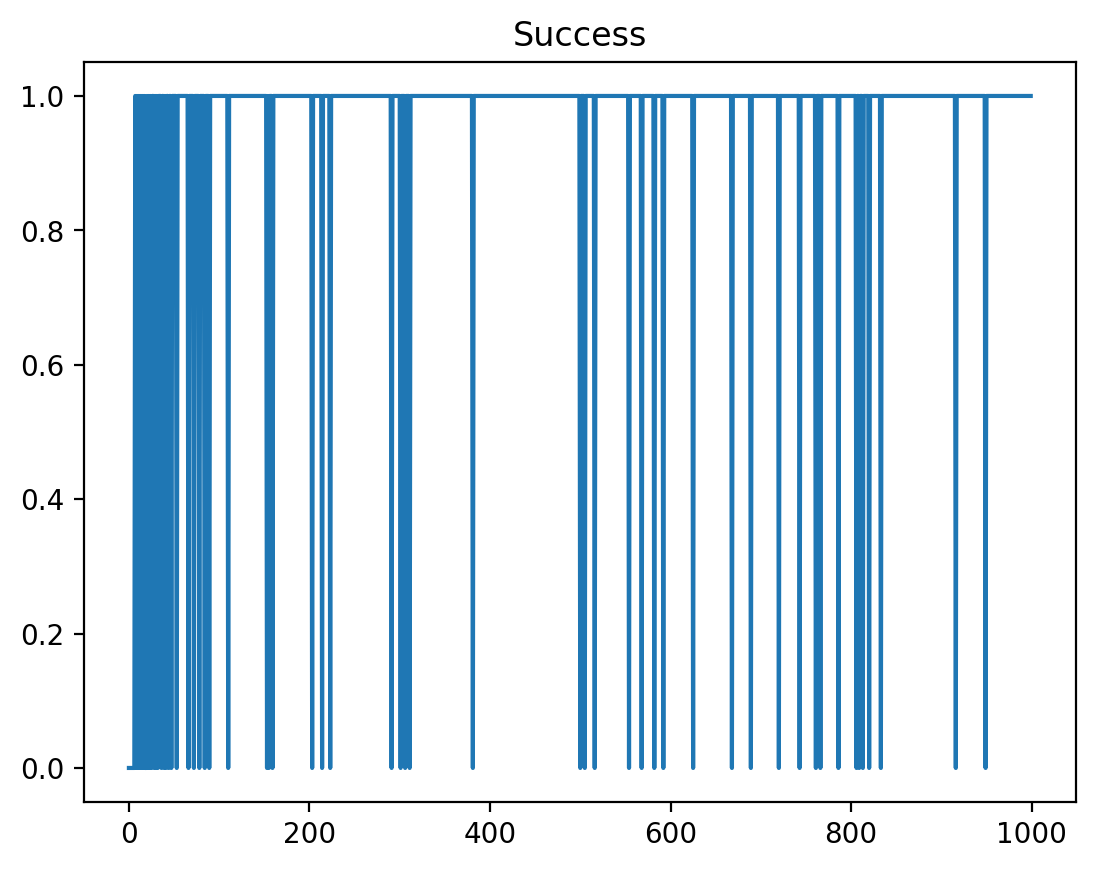

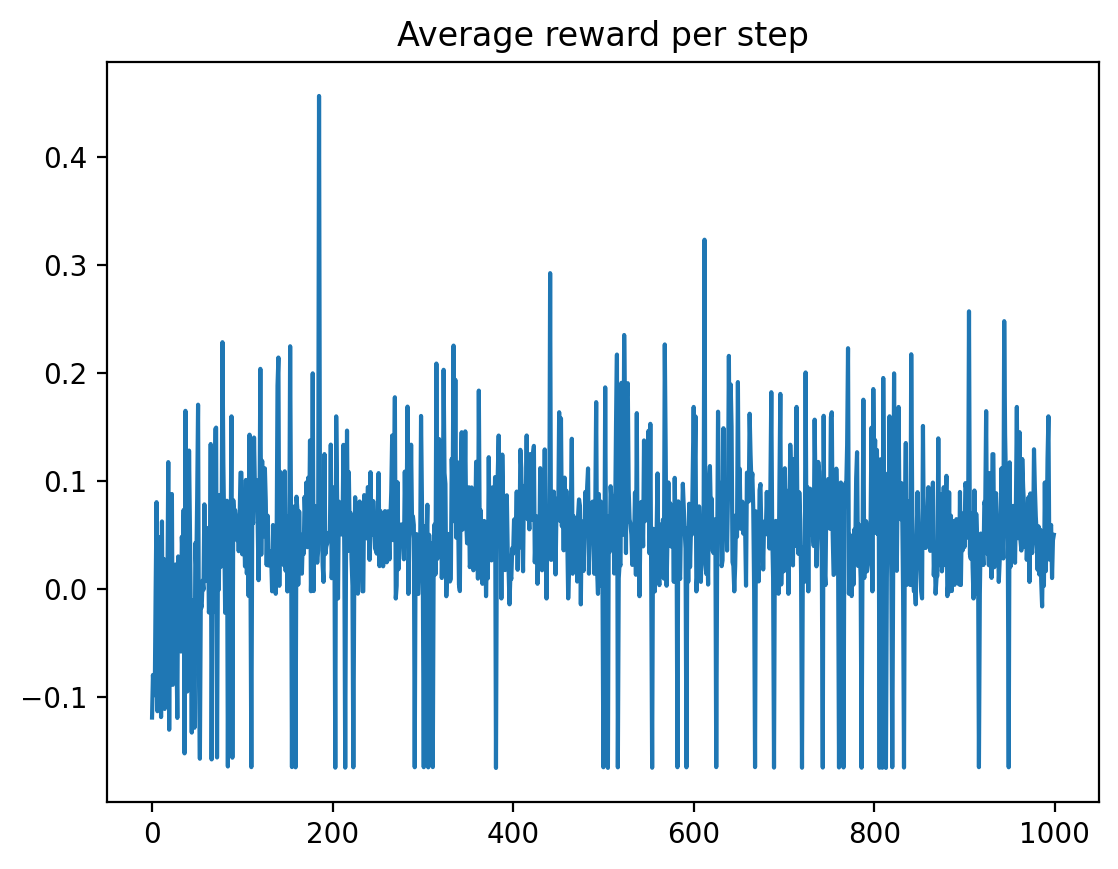

In [ ]:
# @title Run cell to plot success and average true reward
plt.figure()
plt.plot(successes)
plt.title('Success')
plt.show()
plt.plot(rewards)
plt.title('Average reward per step')
plt.show()

In [ ]:
# @title Run cell to visualize learned agent
def visualize(env, q_net, ep_steps):
    # Simulate agent in environment
    frames = []
    state = env.reset()
    for s in range(ep_steps):
        Q = q_net(torch.tensor(state, dtype=torch.float))
        action = epsilon_greedy(Q, epsilon)
        next_state, _, done, _ = env.step(action)

        display.clear_output(wait=True)
        frames.append(env.render('rgb_array'))
        state = next_state
        if done:
            break
    
    # Generate video
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    animate = lambda i: patch.set_data(frames[i])
    anim = animation.FuncAnimation(plt.gcf(), animate, frames=range(len(frames)), interval=50)
    plt.close() # avoid showing extra plots
    return anim
    
visualize(env, q_net, 200)

# Section 3: Ethics


## Part I: Societal Context of DRL: Perspective from Practitioners & Scholars
 
As the practical applications of Deep Reinforcement Learning continue to grow, practitioners and scholars are raising awareness of the potential societal and ethical risks and challenges that must be addressed.  To explore these issues, we will be reading excerpts from [The Societal Implications of Deep Reinforcement Learning](https://www.jair.org/index.php/jair/article/view/12360/26667) published in the *Journal of Artificial Intelligence Research*.
 
Read “Section 3: Challenges DRL Raises for Society, Ethics, and Governance,” which enumerates six specific areas of concern.  Select one of the concerns the authors identified and describe it below. Offer your analysis of why it is an important issue.
 

In [ ]:
area_of_concern = "" #@param {type:"string"}

try:t3;
except NameError: t3 = time.time()

Now, complete your reading of “Section 4: Avenues of Progress in DRL and their Implications,” “Section 5. Discussion” and “Section 6: Summary and Conclusion.”  Do the authors suggest any solutions to the concern you discussed above?  If so, describe their approach.  If not, do you have your own recommendation?


In [ ]:
solution_to_concern = "" #@param {type:"string"}

try:t4;
except NameError: t4 = time.time()

## Part II: Stakeholder Perspective: A Proposed Multi-Factor Analysis for Governmental Use of Autonomous Systems
 
Next, consider the broader real-world uses of autonomous systems from the perspective of various users, spanning from corporate entities to government agencies.  Government agencies face particular ethical and legal challenges when confronted with the choice between adopting an artificial intelligence system or continuing to have humans making the decisions.
 
Read Part IV and the Conclusion of [“A Framework for Governmental Use of Machine Learning”](https://www.acus.gov/sites/default/files/documents/Coglianese%20ACUS%20Final%20Report%20w%20Cover%20Page.pdf), produced by Professor Cary Coglianese, University of Pennsylvania Law School, for the Administrative Conference of the United States (ACUS) in December 2020, which analyses the uses and implications of AI systems in the government and proposes a framework for public officials to use in deciding when to adopt AI tools. 
 
The report proposes a **multifactor analysis method** for government agencies to choose between AI and the status quo. Write a response addressing the following questions. 
- Considering your prior reading on the societal implications of DRL, is this multifactored method effective when agencies are faced with the choice of whether or not to adopt an autonomous system? 
- Are the prongs proposed in the report sufficient to address the issue you analyzed above? Why or why not? 
- Are these consistent with the proposals of the authors in “The Societal Implications of Deep Reinforcement Learning”? If not, which one do you think would better address the societal concerns arising from DRL? Would you propose a different approach?  
- In what ways do DRL systems introduce additional concerns than other autonomous systems?

In [ ]:
part_2_response = "" #@param {type:"string"}

try:t5;
except NameError: t5 = time.time()

# Submission

Once you're done, click on 'Share' and add the link to the box below. If you did not use CoLab, you can also upload the file or notebook in the form below.

In [ ]:
link = 'https://colab.research.google.com/drive/1WIYKHa5uu3N3DSqt1P6KUwMHNVOygR5S?usp=sharing' #@param {type:"string"}

In [ ]:
import time
import numpy as np
import urllib.parse
from IPython.display import IFrame


#@markdown #Run Cell to Show Airtable Form
#@markdown ##**Confirm your answers and then click "Submit"**


def prefill_form(src, fields: dict):
  '''
  src: the original src url to embed the form
  fields: a dictionary of field:value pairs,
  e.g. {"pennkey": my_pennkey, "location": my_location}
  '''
  prefill_fields = {}
  for key in fields:
      new_key = 'prefill_' + key
      prefill_fields[new_key] = fields[key]
  prefills = urllib.parse.urlencode(prefill_fields)
  src = src + prefills
  return src


#autofill fields if they are not present
#a missing pennkey and pod will result in an Airtable warning
#which is easily fixed user-side.
try: my_pennkey;
except NameError: my_pennkey = ""
try: my_pod;
except NameError: my_pod = "Select"
try: extension;
except NameError: extension = "Double Q-learning"
try: explanation;
except NameError: explanation = ""
try: ablation;
except NameError: ablation = ""
try: state_dimension;
except NameError: state_dimension = 0
try: num_actions;
except NameError: num_actions = 0
try: meaning;
except NameError: meaning = ""
try: area_of_concern;
except NameError: area_of_concern = ""
try: solution_to_concern;
except NameError: solution_to_concern = ""
try: part_2_response;
except NameError: part_2_response = ""
try: link;
except NameError: link = ""

fields = {"pennkey": my_pennkey,
          "pod": my_pod,
          "extension": extension,
          "explanation": explanation,
          "ablation": ablation,
          "state_dimension": state_dimension,
          "num_actions": num_actions,
          "meaning": meaning,
          "area_of_concern": area_of_concern,
          "solution_to_concern": solution_to_concern,
          "part_2_response": part_2_response,
          "link": link}

src = "https://airtable.com/embed/shrb6cgGnu17S8MhJ?"


#now instead of the original source url, we do: src = prefill_form(src, fields)
display.display(IFrame(src = prefill_form(src, fields), width = 800, height = 400))